In [1]:
import cobra
import pandas as pd
import modelseedpy
%run analysis.py

modelseedpy 0.4.0


In [2]:
model_rhoda = cobra.io.load_json_model('./data/model_rhoda_gf2.json')
model_acido = cobra.io.load_json_model('./data/model_acido_gf2.json')

Set parameter TSPort to value 27070
Set parameter TokenServer to value "lic-vmw-01.cels.anl.gov"


In [3]:
MEDIA_ACETATE_NITRATE = {
    'EX_cpd00067_e0': 100.0,
    'EX_cpd00058_e0': 100.0,
    'EX_cpd00971_e0': 34.9324073,
    'EX_cpd00013_e0': 100.0,
    'EX_cpd00205_e0': 1.3415688,
    'EX_cpd00009_e0': 100.0,
    'EX_cpd11574_e0': 100.0,
    'EX_cpd00048_e0': 100.0,
    'EX_cpd00030_e0': 100.0,
    'EX_cpd00209_e0': 10.0,
    'EX_cpd00254_e0': 100.0,
    'EX_cpd10515_e0': 100.0,
    'EX_cpd00149_e0': 100.0,
    'EX_cpd00099_e0': 100.0,
    'EX_cpd00001_e0': 100.0,
    'EX_cpd00029_e0': 20.0,
    'EX_cpd00063_e0': 100.0,
    'EX_cpd00034_e0': 100.0,
    'EX_cpd00305_e0': 100.0
}

In [4]:
model_rhoda.medium = MEDIA_ACETATE_NITRATE
model_acido.medium = MEDIA_ACETATE_NITRATE

In [5]:
model_acido.reactions.rxn10126_c0.upper_bound = 0
model_rhoda.reactions.rxn10126_c0.upper_bound = 0

### Calculate MAX ATPM

In [6]:
df_growth_data_r12 = pd.read_csv('./data/growth_data_R12.tsv', sep='\t')
df_growth_data_3h11 = pd.read_csv('./data/growth_data_3H11.tsv', sep='\t')

In [ ]:
total_time 	gdw 	ac 	no3 	no2 	n2o 	atpm 	atpm_per_gdw_per_h
0 	23.0 	0.000006 	-0.009394 	-0.054518 	0.041815 	0.0 	0.050478 	0.002195
1 	19.0 	0.000009 	-0.091716 	-0.344241 	0.337841 	0.0 	0.474340 	0.024965
2 	11.0 	0.000005 	-0.013321 	-0.111735 	0.144979 	0.0 	0.072216 	0.006565
3 	18.0 	0.000006 	0.018274 	0.000797 	0.007772 	0.0 	NaN 	NaN
4 	24.0 	-0.000003 	-0.004143 	0.000138 	-0.004123 	0.0 	NaN 	NaN

In [8]:
model = model_rhoda
model.medium = MEDIA_ACETATE_NITRATE
model.objective_direction = 'max'
exp_data = df_growth_data_3h11.transpose().to_dict()
for i in range(len(exp_data) - 1):
    t_x = exp_data[i]
    t_x_plus_1 = exp_data[i + 1]
    time = t_x_plus_1['time'] - t_x['time']
    od_dt = t_x_plus_1['OD600'] - t_x['OD600']
    ac_dt = (t_x_plus_1['Acetate'] - t_x['Acetate'])/time
    no3_dt = (t_x_plus_1['NO3'] - t_x['NO3'])/time
    no2_dt = (t_x_plus_1['NO2'] - t_x['NO2'])/time
    n2o_dt = (t_x_plus_1['N2O'] - t_x['N2O'])/time
    
    print(time, od_dt, ac_dt, no3_dt, no2_dt, n2o_dt)

23.0 0.022940000000000002 -0.009393526086956427 -0.05451826478260867 0.04181544043478261 0.0
19.0 0.027999999999999997 -0.09171647894736841 -0.3442412673684211 0.3378405647368421 0.0
11.0 0.009679999999999994 -0.01332054545454559 -0.11173495727272727 0.14497897545454547 0.0
18.0 0.017140000000000002 0.01827421666666673 0.0007971911111111114 0.00777229611111115 0.0
24.0 -0.013589999999999991 -0.004142845833333464 0.00013797541666666613 -0.004122567500000063 0.0


In [8]:
df_growth_data_3h11.transpose().to_dict()

{0: {'time': 0.0,
  'Acetate': 18.0313603,
  'OD600': 0.01013,
  'NO3': 9.14450462,
  'NO2': 0.09977915,
  'N2O': 0.0},
 1: {'time': 23.0,
  'Acetate': 17.8153092,
  'OD600': 0.03307,
  'NO3': 7.89058453,
  'NO2': 1.06153428,
  'N2O': 0.0},
 2: {'time': 42.0,
  'Acetate': 16.0726961,
  'OD600': 0.06107,
  'NO3': 1.35000045,
  'NO2': 7.48050501,
  'N2O': 0.0},
 3: {'time': 53.0,
  'Acetate': 15.9261701,
  'OD600': 0.07075,
  'NO3': 0.12091592,
  'NO2': 9.07527374,
  'N2O': 0.0},
 4: {'time': 71.0,
  'Acetate': 16.255106,
  'OD600': 0.08789,
  'NO3': 0.13526536,
  'NO2': 9.21517507,
  'N2O': 0.0},
 5: {'time': 95.0,
  'Acetate': 16.1556777,
  'OD600': 0.0743,
  'NO3': 0.13857677,
  'NO2': 9.11623345,
  'N2O': 0.0}}

In [9]:
exp_data_3h11 = {
    'time_total': 71,
    'ac_uptake': -1.7762543,
    'growth_OD': 0.07776,
    'OD_coeff': 0.006,
    'no3_uptake': -9.00923926
}
exp_data_r12 = {
    'time_total': 336,
    'ac_uptake': -5.4139872,
    'growth_OD': 0.40074,
    'OD_coeff': 0.008,
    'no3_uptake': -9.03407482
}

In [10]:
calc_max_ATPM(model_acido, exp_data_3h11) # MAX ATPM 9.67570638881224 biomass gDW 0.00046656 OD600 0.07776

('Fe2+ [e0]', 100.0)
('Acetate [e0]', 1.7762543)
('Cl- [e0]', 100.0)
('Cu2+ [e0]', 100.0)
('Phosphate [e0]', 100.0)
('Co2+ [e0]', 100.0)
('Sulfate [e0]', 100.0)
('Zn2+ [e0]', 100.0)
('H+ [e0]', 100.0)
('Na+ [e0]', 34.9324073)
('Mg [e0]', 100.0)
('Nitrate [e0]', 9.00923926)
('H2O [e0]', 100.0)
('Thiamin [e0]', 100.0)
('Mn2+ [e0]', 100.0)
('K+ [e0]', 1.3415688)
('Molybdate [e0]', 100.0)
('NH3 [e0]', 100.0)
('Ca2+ [e0]', 100.0)
MAX ATPM 8.127067375580943
biomass gDW 0.00046655999999994767 OD600 0.07775999999999128


(<Solution 8.127 at 0x7fa17e61bca0>, <Solution 0.000 at 0x7fa17e654490>)

In [11]:
calc_max_ATPM(model_rhoda, exp_data_r12) # MAX ATPM 23.8 biomass gDW 0.0032059199999983842 OD600 0.40073999999979804

('Fe2+ [e0]', 100.0)
('Cl- [e0]', 100.0)
('Cu2+ [e0]', 100.0)
('Phosphate [e0]', 100.0)
('Co2+ [e0]', 100.0)
('Sulfate [e0]', 100.0)
('Zn2+ [e0]', 100.0)
('H+ [e0]', 100.0)
('Acetate [e0]', 5.4139872)
('Na+ [e0]', 34.9324073)
('Mg [e0]', 100.0)
('H2O [e0]', 100.0)
('Nitrate [e0]', 9.03407482)
('Thiamin [e0]', 100.0)
('Mn2+ [e0]', 100.0)
('K+ [e0]', 1.3415688)
('Molybdate [e0]', 100.0)
('NH3 [e0]', 100.0)
('Ca2+ [e0]', 100.0)
MAX ATPM 13.730522070894999
biomass gDW 0.0032059199999995964 OD600 0.4007399999999495


(<Solution 13.731 at 0x7fa17e6552a0>, <Solution 0.003 at 0x7fa17e655660>)

In [12]:
solution_acido_wt = cobra.flux_analysis.pfba(model_acido)
solution_rhoda_wt = cobra.flux_analysis.pfba(model_rhoda)
print(solution_acido_wt.fluxes['bio1'], solution_rhoda_wt.fluxes['bio1'])

0.00046655999999994767 0.0032059199999995964


### Isolate Fitness

In [14]:
solutions_acido, tests_acido = _isolate_test(model_acido)
solutions_rhoda, tests_rhoda = _isolate_test(model_rhoda)

100%|██████████| 43/43 [00:07<00:00,  5.83it/s]


In [15]:
df_report = _report(solutions_acido, solutions_rhoda, tests_acido)
df_report

,cpd_name,3H11,R12,3H11 (ATP),R12 (ATP),3H11 (acetate),R12 (acetate),3H11 (nitrate),R12 (nitrate)
cpd_id,,,,,,,,,
cpd00020_c0,Pyruvate [c0],1.0,1.000000,1.000000,1.000000,-2.000000,-2.000000,-1.451613,-2.142857
cpd00107_c0,L-Leucine [c0],1.0,1.000000,3.000000,3.000000,-5.000000,-5.238095,-3.548387,-5.952381
cpd00039_c0,L-Lysine [c0],1.0,1.000000,5.000000,5.000000,-4.918919,-6.000000,-5.675676,-10.000000
cpd00119_c0,L-Histidine [c0],1.0,1.000000,11.000000,10.000000,-7.306306,-7.539683,-11.225225,-17.158730
cpd00322_c0,L-Isoleucine [c0],1.0,1.000000,4.000000,5.000000,-5.000000,-6.333333,-4.363636,-10.333333
cpd00161_c0,L-Threonine [c0],1.0,1.000000,3.211538,4.000000,-2.788462,-3.952381,-3.153846,-7.809524
cpd00065_c0,L-Tryptophan [c0],1.0,1.000000,13.000000,13.000000,-9.000000,-11.476190,-13.000000,-22.904762
cpd00069_c0,L-Tyrosine [c0],1.0,1.000000,9.000000,9.000000,-7.018018,-8.746032,-9.072072,-15.984127
cpd00054_c0,L-Serine [c0],1.0,1.000000,2.000000,2.000000,-2.000000,-2.190476,-2.225806,-3.761905


### Build Comm Model

In [16]:
%run ms_ext_symcom.py

In [17]:
cf = CommFactory().with_model(model_acido, 0.7, 'A').with_model(model_rhoda, 0.3, 'R')
model_comm = _build(cf)
if 'bio1' not in model_comm.reactions:
    r_bio_sum = Reaction("bio1", "bio_com", "", 0, 1000)
    r_bio_sum.add_metabolites(
        {
            model_comm.metabolites.cpd11416_cA: -0.4,
            model_comm.metabolites.cpd11416_cR: -0.6,
        }
    )
    model_comm.add_reactions([r_bio_sum])
model_comm.objective = 'bio1'
model_comm

Name,model
Memory address,7f9af3499180
Number of metabolites,2401
Number of reactions,2596
Number of genes,0
Number of groups,0
Objective expression,1.0*bio1 - 1.0*bio1_reverse_b18f7
Compartments,"cA, e0, cR"


In [18]:
GSP_MEDIUM = {
    'EX_cpd00001_e0': 1000.0,
    'EX_cpd00013_e0': 1000.0,

    'EX_cpd00209_e0': 12.0,
    'EX_cpd00029_e0': 20.0, # acetate
 
    'EX_cpd00218_e0': 100.0,
    'EX_cpd00220_e0': 100.0,
    'EX_cpd00644_e0': 0.0002281,
    'EX_cpd00305_e0': 100.0,
    'EX_cpd00393_e0': 100.0,
    'EX_cpd03424_e0': 100.0,
    'EX_cpd00443_e0': 100.0,
    'EX_cpd00263_e0': 100.0,
    'EX_cpd00048_e0': 100.0,
    'EX_cpd00009_e0': 100.0,
    'EX_cpd00242_e0': 29.759425,
    'EX_cpd00205_e0': 1.3415688,
    'EX_cpd00063_e0': 100.0,
    'EX_cpd00971_e0': 34.9324073,
    'EX_cpd00099_e0': 100.0,
    'EX_cpd00254_e0': 100.0,
    'EX_cpd00030_e0': 100.0,
    'EX_cpd00058_e0': 100.0,
    'EX_cpd00034_e0': 100.0,
    'EX_cpd10515_e0': 100.0,
    'EX_cpd00149_e0': 100.0,
    'EX_cpd00244_e0': 100.0,
    'EX_cpd11574_e0': 100.0,
    'EX_cpd15574_e0': 100.0,
    'EX_cpd00067_e0': 100.0,
 }
model_comm.medium = {rxn_id: v for rxn_id, v in GSP_MEDIUM.items() if rxn_id in model_comm.reactions}

In [19]:
#model_comm.reactions.LeuE_cA.upper_bound = -10
solution_comm_wt = cobra.flux_analysis.pfba(model_comm)
model_comm.summary(solution_comm_wt)

Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00009_e0,EX_cpd00009_e0,0.02563,0,0.00%
cpd00013_e0,EX_cpd00013_e0,0.3103,0,0.00%
cpd00029_e0,EX_cpd00029_e0,8.257,2,100.00%
cpd00030_e0,EX_cpd00030_e0,6.205E-05,0,0.00%
cpd00034_e0,EX_cpd00034_e0,6.205E-05,0,0.00%
cpd00048_e0,EX_cpd00048_e0,0.007969,0,0.00%
cpd00058_e0,EX_cpd00058_e0,6.205E-05,0,0.00%
cpd00063_e0,EX_cpd00063_e0,6.205E-05,0,0.00%
cpd00067_e0,EX_cpd00067_e0,20,0,0.00%
cpd00099_e0,EX_cpd00099_e0,6.205E-05,0,0.00%


In [20]:
model_comm.reactions.ATPM_cA.lower_bound = 0
model_comm.reactions.ATPM_cR.lower_bound = 0

## SynCom Fitness

In [54]:
from tqdm import tqdm
import numpy as np
sols = {}
order = []
it = 0
for i in tqdm(np.arange(0.0, 40.2, 1)):
    i = round(i, 4)
    #print(i)
    model_comm.reactions.EX_cpd00209_e0.lower_bound = -i
    try:
        sol = cobra.flux_analysis.pfba(model_comm)
        sols[it] = sol
    except Exception:
        sols[it] = None
    order.append(it)
    it += 1

100%|██████████| 41/41 [00:17<00:00,  2.31it/s]


<Axes: xlabel='i', ylabel='value'>

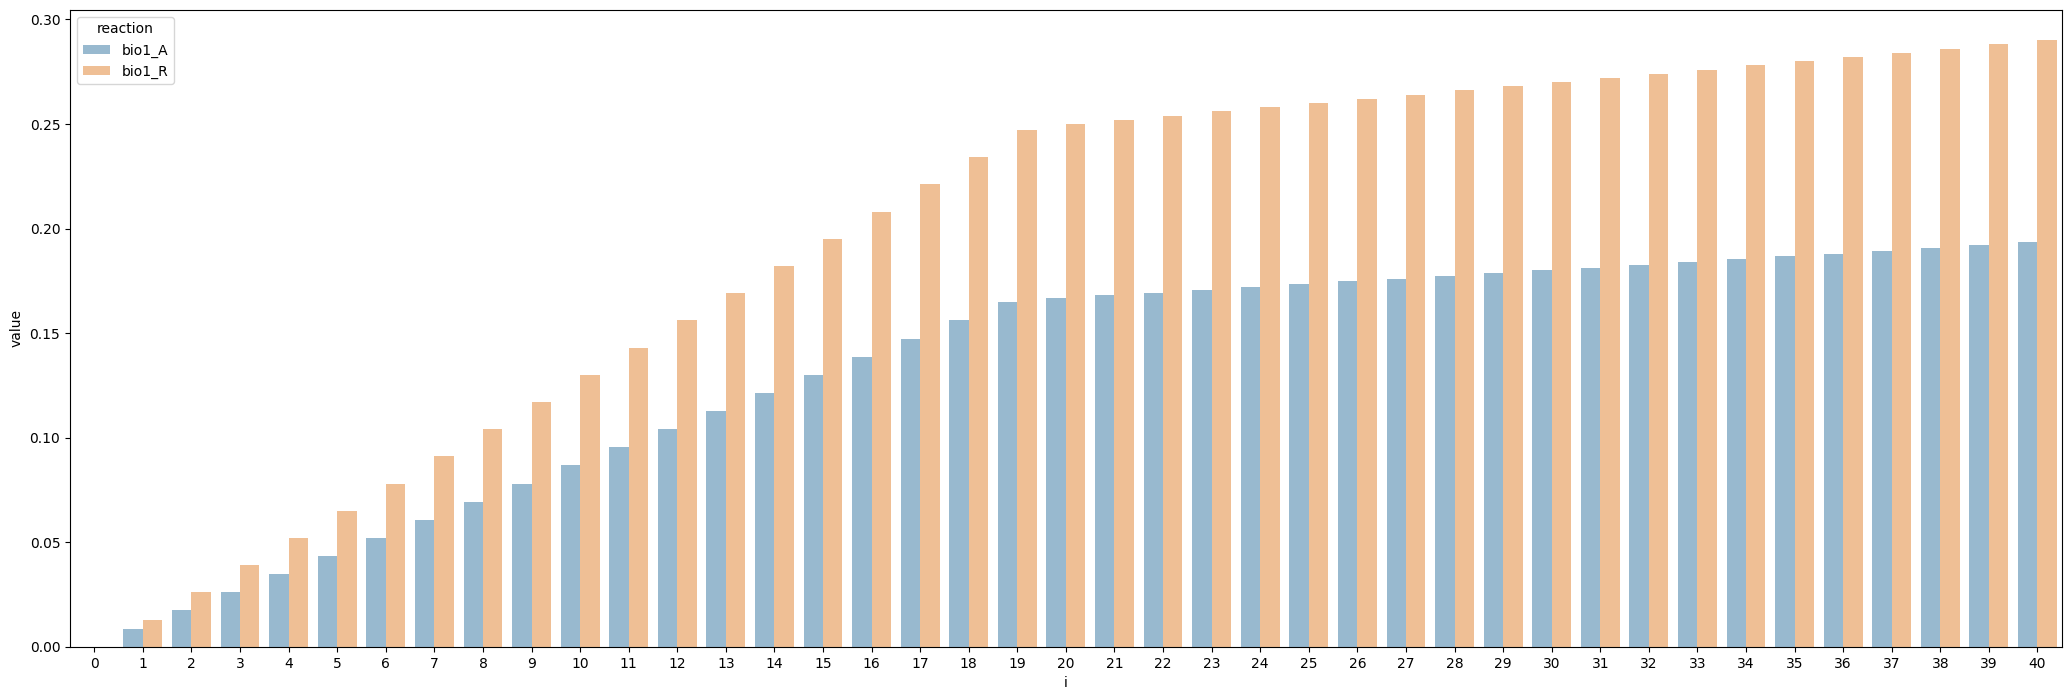

In [55]:
import numpy as np
fba_results = {
    'order': order,
    'fba': {}
}
for i in order:
    fba_results['fba'][i] = {
        'status': sols[i].status if sols[i] else None,
        'fluxes': sols[i].fluxes.to_dict() if sols[i] else {}
    }
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_data = {
    'i': [],
    'reaction': [],
    'value': []
}
monitor = ['bio1_A', 'bio1_R']
for i in fba_results['order']:
    sol = fba_results['fba'][i]
    for m in monitor:
        m_flux = sol['fluxes'].get(m, 0)
        df_data['i'].append(i)
        df_data['reaction'].append(m)
        df_data['value'].append(math.fabs(m_flux))
df_bar = pd.DataFrame(df_data)
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.barplot(data = df_bar, x='i', y='value', hue='reaction', alpha=0.5, ax=ax)

In [56]:
import math
import pandas as pd
import seaborn as sns

alias = {
    'dnr00004_cA': 'Nos (A)',
    'dnr00004_cR': 'Nos (R)',
    'rxn05488_cA': 'AC (A)',
    'rxn05488_cR': 'AC (R)',
    'dnr00003_cA': 'Nor (A)',
    'dnr00003_cR': 'Nor (R)',
    'dnr00001_cA': 'Nar (A)',
    'dnr00001_cR': 'Nar (R)',
    'dnr00002_cR': 'Nir (R)',
    'rxn09004_cR': 'Nitrate (A)',
    'rxn09004_cA': 'Nitrate (R)',
    
    'rxn08173_cA': 'ATPS (A)',
    'rxn08173_cR': 'ATPS (R)',
    
    'rxn05625_cA': 'Nitrite (A)',
    'rxn05625_cR': 'Nitrite (R)',
    
    'rxn01806_cR': 'NO -> N2O (A)',
    'rxn01806_cA': 'NO -> N2O (R)',
    'rxn05467_cA': 'CO2 (A)',
    'rxn05467_cR': 'CO2 (R)',
    
    'EX_cpd00528_e0': 'N2 (e)',
    'EX_cpd00659_e0': 'N2O (e)',
    'EX_cpd00418_e0': 'NO (e)',
    'EX_cpd00209_e0': 'Nitrate (e)',
    'EX_cpd00075_e0': 'Nitrite (e)',
    'EX_cpd00029_e0': 'AC (e)',
}
palette = {
    'Nos (A)': 'blue',
    'Nos (A)': 'blue',
    'Nor (A)': 'blue',
    'Nor (R)': 'blue',
    'Nar (A)': 'blue',
    'Nar (R)': 'blue',
    'Nir (R)': 'blue',
}
monitor_A = [
    'rxn05488_cA',  # acetate uptake
    'dnr00004_cA',   # Nos
    #'dnr00003_cA',   # Nor
                     # Nir
    'dnr00001_cA',   # Nar
    #'rxn09004_cR', 'rxn09004_cA',
    #'rxn01806_cR', 'rxn01806_cA',
    #'rxn08173_cA', 'rxn08173_cR',
    #'rxn05467_cA', 'rxn05467_cR',
    #'EX_cpd00528_e0',
    #'EX_cpd00659_e0',
    #'EX_cpd00418_e0',
    #'EX_cpd00209_e0',
    #'EX_cpd00075_e0'
    #'EX_cpd00029_e0'
]
monitor_R = [
    'rxn05488_cR', # acetate uptake
    'dnr00004_cR',  # Nos
    #'dnr00003_cR',  # Nor
    'dnr00001_cR',  # Nar
    'dnr00002_cR',  # Nir
    
    
    #'rxn09004_cR', 'rxn09004_cA',
    #'rxn01806_cR', 'rxn01806_cA',
    #'rxn08173_cA', 'rxn08173_cR',
    #'rxn05467_cA', 'rxn05467_cR',
    #'EX_cpd00528_e0',
    #'EX_cpd00659_e0',
    #'EX_cpd00418_e0',
    #'EX_cpd00209_e0',
    #'EX_cpd00075_e0'
    #'EX_cpd00029_e0'
]
monitor2 = {
    
    #'rxn05625_cA': [],
    #'rxn05625_cR': [],
    #'rxn09008_cA': [],
    #'rxn09008_cR': [],
    #'rxn08966_cA': [],
    #'rxn08966_eR': [],
    
}

df_array = []

for monitor in [monitor_A, monitor_R]:

    df_data = {
        'i': [],
        'reaction': [],
        'value': []
    }
    for i in range(len(sols)):
        sol = sols[i]
        for m in monitor:
            df_data['i'].append(i)
            df_data['reaction'].append(alias[m])
            df_data['value'].append(math.fabs(sol.fluxes[m] if sol else 0))
        for m in monitor2:
            df_data['i'].append(i)
            df_data['reaction'].append(alias[m])
            df_data['value'].append(sol.fluxes[m] if sol else 0)
    df_line = pd.DataFrame(df_data)
    df_array.append(df_line)

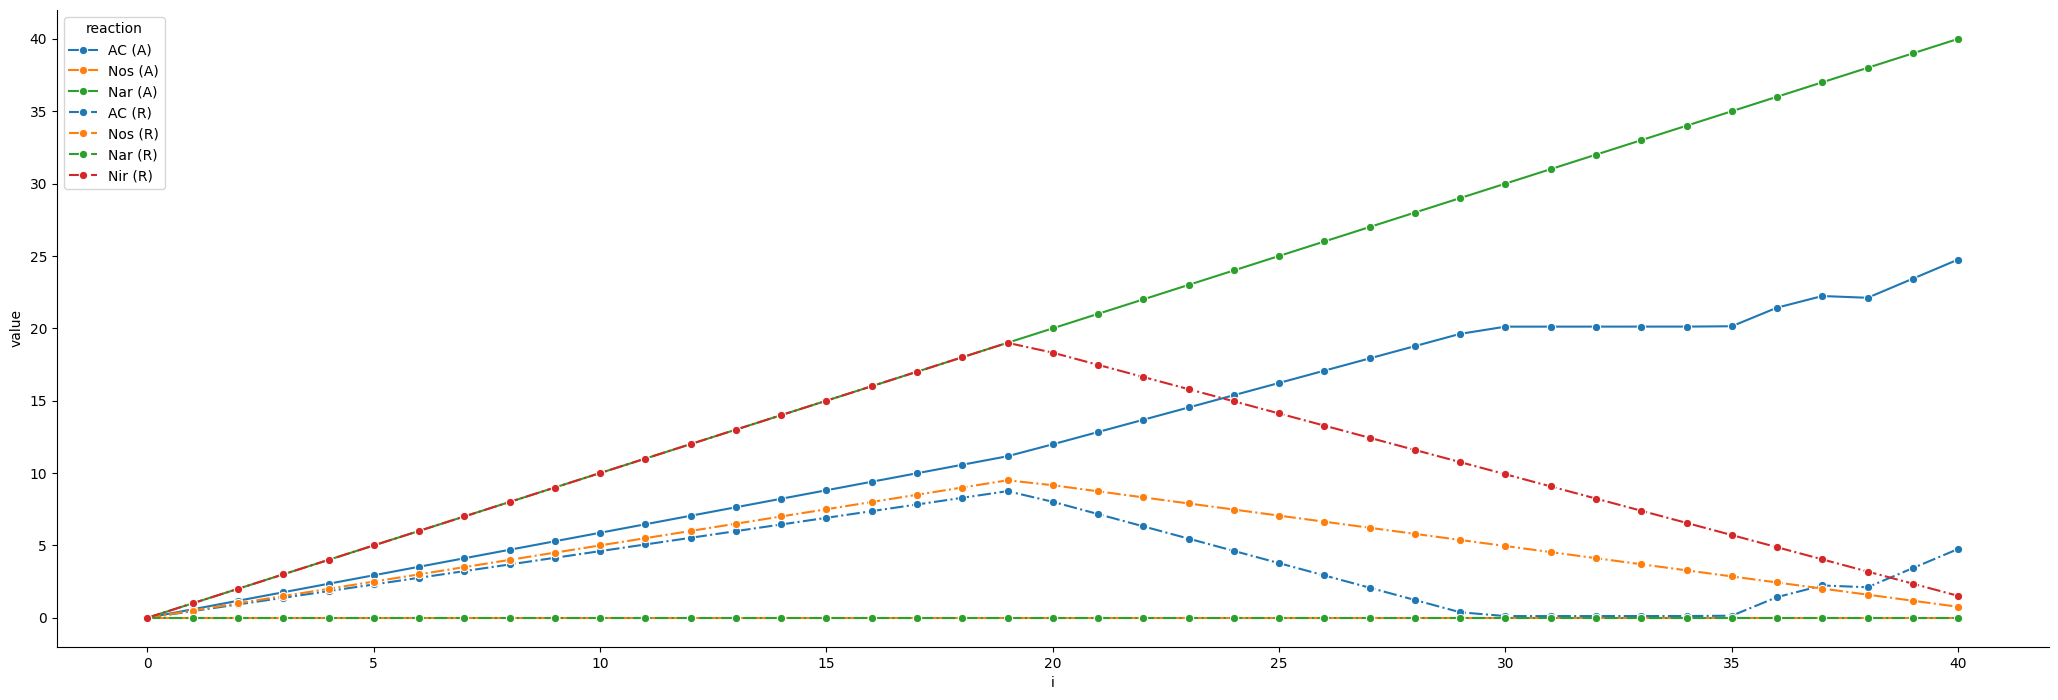

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.lineplot(data = df_array[0], x='i', y='value', hue='reaction', marker='o', sort = False, ax=ax, linestyle='-')
sns.lineplot(data = df_array[1], x='i', y='value', hue='reaction', marker='o', sort = False, ax=ax, linestyle='-.')
sns.despine(fig, ax)

In [21]:
%run ./plots.py

In [22]:
comm_plots = CommPlots(model_comm)

In [23]:
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()

*USE CPLEX/Gurobi*

In [24]:
model_comm.reactions.ATPM_cA.lower_bound = 0
model_comm.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)

0 GROWTH 0 ATPM, exceess 0.000191940582487443 0.000187955542487443
0 MAX isolate ATPM 0.028236221306551294 0.02827917896272114
1 GROWTH 0 ATPM, exceess 0.001888132577144598 0.001844121677144598
1 MAX isolate ATPM 0.3263038976206865 0.3263131002403429
2 GROWTH 0 ATPM, exceess 0.0030883582995792987 0.0030503749995792985
2 MAX isolate ATPM 0.49364711189283617 0.4936568490326416
3 GROWTH 0 ATPM, exceess 0.0008352460417363649 0.000817766041736365
3 MAX isolate ATPM 0.10946916214989552 0.10946899418676366
4 GROWTH 0 ATPM, exceess 0.0007878646456795466 0.0007790746456795467
4 MAX isolate ATPM 0.09910013596809789 0.09909932367559192
5 GROWTH 0 ATPM, exceess 0.000286775052840961 0.000278264052840961
5 MAX isolate ATPM 0.04174117533049241 0.04174231193192974
6 GROWTH 0 ATPM, exceess 7.509485040651564e-06 8.971395040651564e-06
6 MAX isolate ATPM 0.0007191215624999999 0.0007191215625000004
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0.01129448

In [25]:
model_comm.reactions.rxn05161_cA.upper_bound = 0

In [26]:
solution_leucine_50 = comm_plots.generate_leucine_efflux_data(cobra, solution_exp, expected_growth_60R_40A, rates, 0.5)
solution_leucine_10 = comm_plots.generate_leucine_efflux_data(cobra, solution_exp, expected_growth_60R_40A, rates, 0.1)

0 -0.003941886229052335
1 -0.03810201543424074
2 -0.0626926377796009
3 -0.016843006085919782
4 -0.015246533377311711
5 -0.006421283066603402
6 -0.00010822331801470589
0 -0.0008820650746455874
1 -0.010049925127867594
2 -0.015199358853101417
3 -0.003370306553362821
4 -0.0030499975721388047
5 -0.001282549398107594
6 -2.212681730769256e-05


In [27]:
solution_leucine_50[5].fluxes['LeuE_cA'], solution_leucine_50[5].fluxes['rxn05161_cR'], solution_leucine_50[5].fluxes['rxn05161_cA']

(-0.006421283066603402, 0.006421283066603402, 0.0)

In [28]:
exp_syncom = comm_plots.get_exp_syncom()

Biomass 3H11 0.0008575773279999989 Biomass R12 0.0013000459919999979 Biomass Total 0.002157623319999997 Time 141 Acetate 12.911978860761227 NO3 0.11462903200001467 NO2 1.6041981451264902 N2O 0.0 N2 3.762728296436669


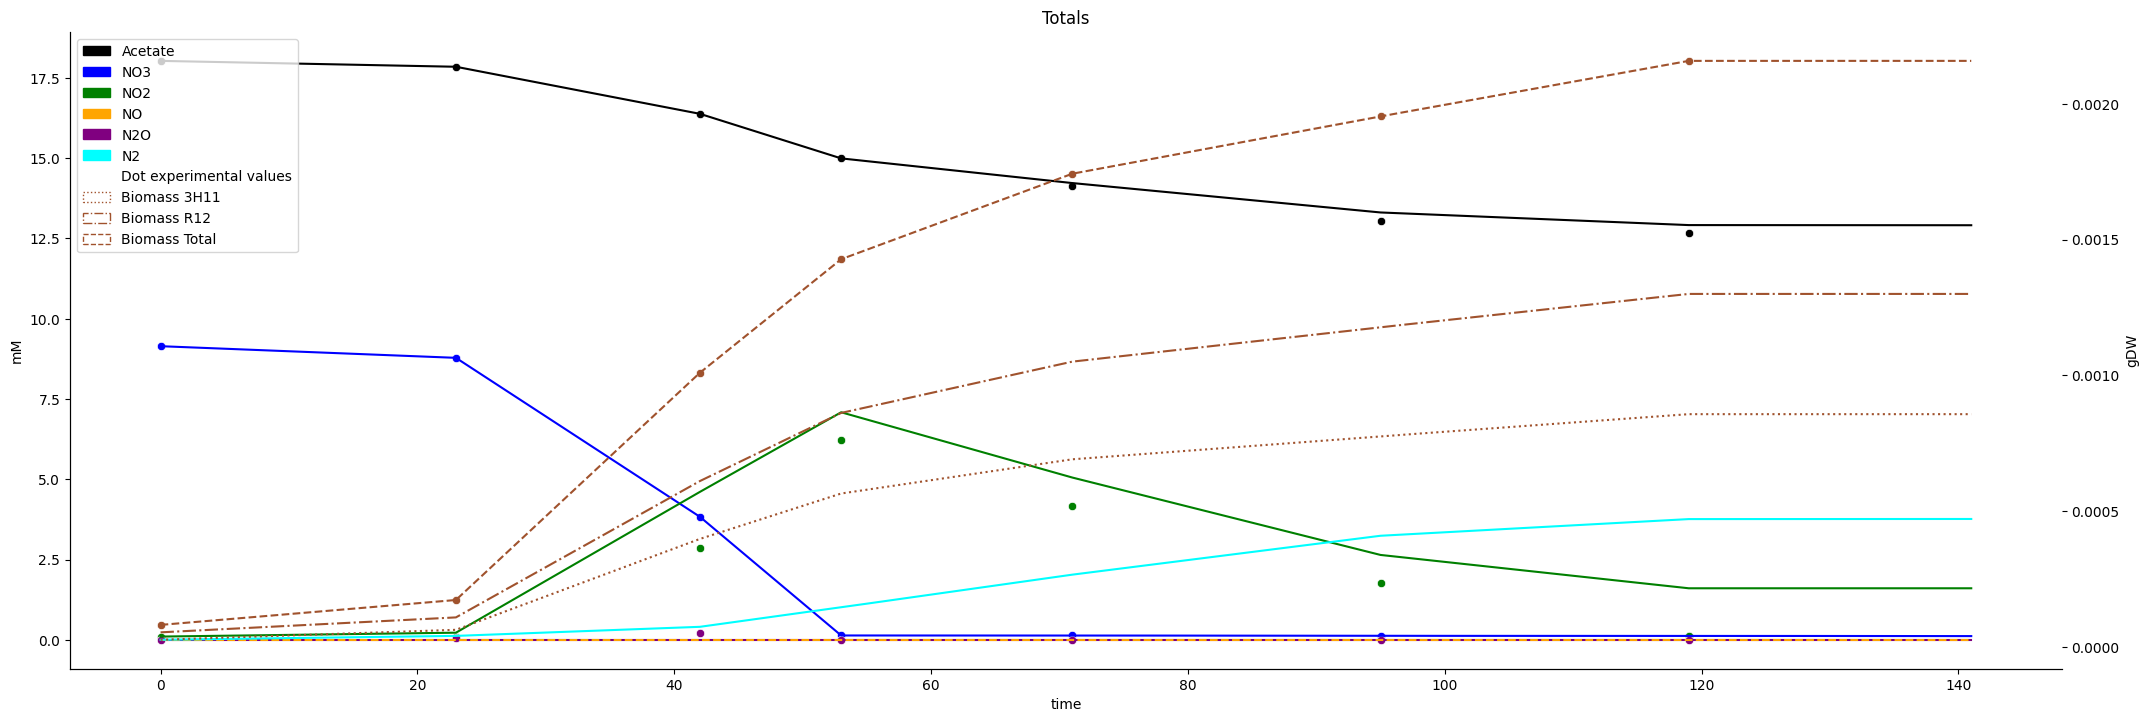

In [29]:
comm_plots.plot_total_acc(comm_plots.generate_total_acc_data(time_steps, solution_exp), exp_syncom)

0.011294488522620518 0.016902451211401708
0.13052155904827462 0.19578287463879898
0.1974588447571345 0.2961847759381984
0.04378766485995821 0.0656852387723718
0.03964005438723916 0.059461172230438786
0.016696470132196963 0.02505557834614912
0.000287648625 0.0004314729374999997


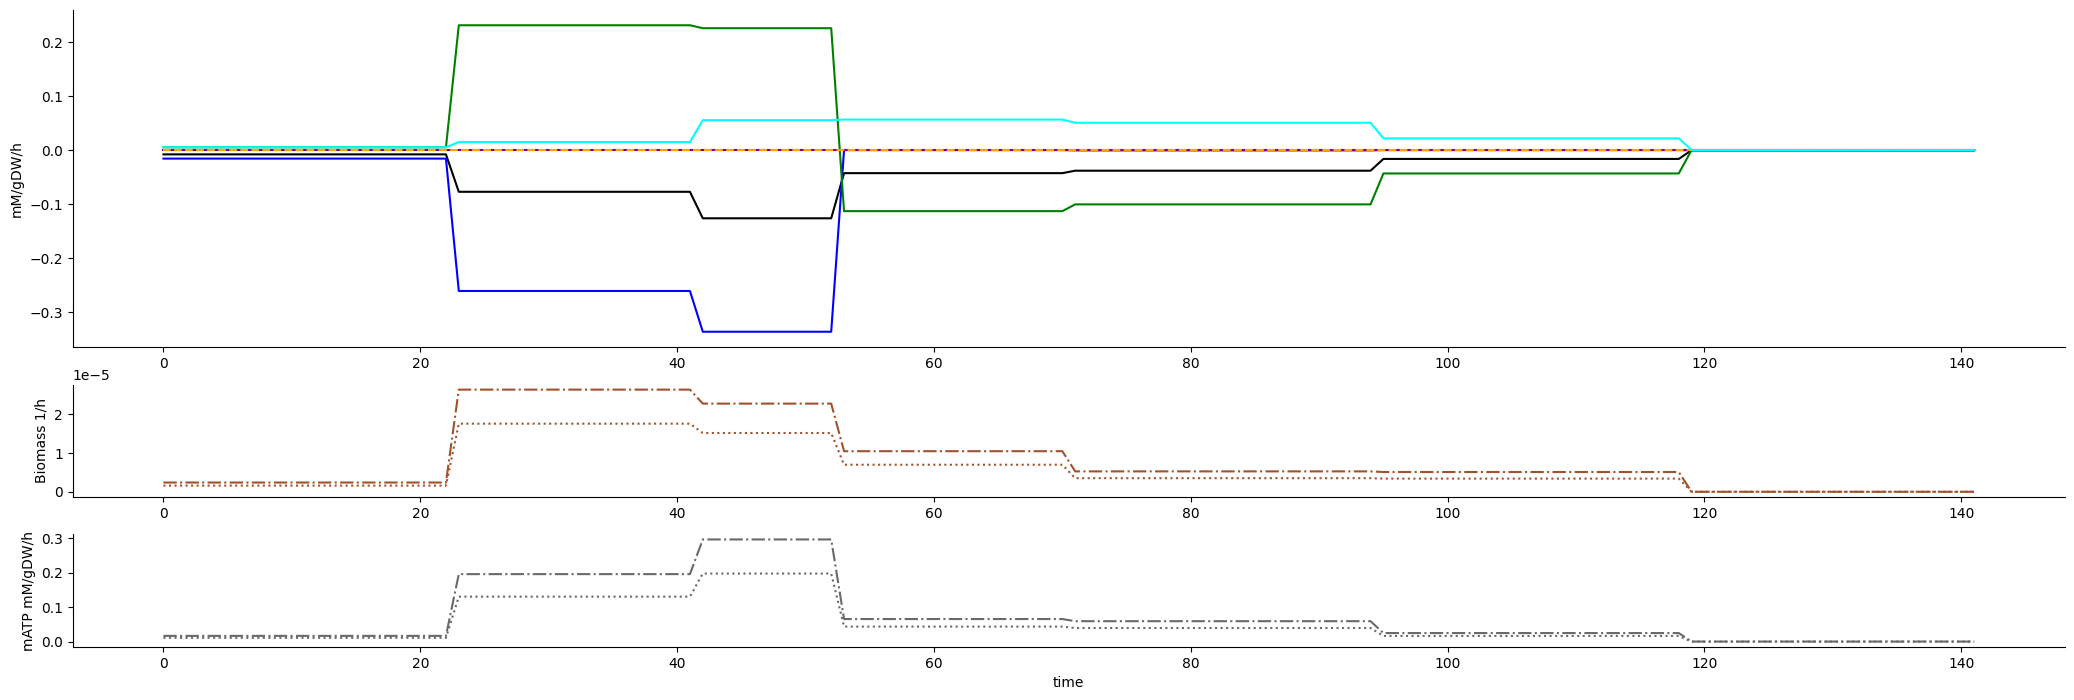

In [30]:
total_uptake_data = comm_plots.generate_total_uptake_data(time_steps, solution_exp)
comm_plots.plot_total_uptake(total_uptake_data)

0.007963227816728332 -0.007755222278711355 -0.00020800553801697636
0.077158311 -0.1403113224084952 0.0631530114084952
0.1262053909999964 -0.13192505940181345 0.005719668401817074
0.042691063598890355 0 -0.042691063598890355
0.038153069569750564 0 -0.038153069569750564
0.016384500000000076 0 -0.016384500000000076
0.00020996249999999996 -0.00014023541860465116 -6.97270813953488e-05
0.00796337 -0.011803974318807905 0.0038406043188079038
0.077158311 -0.17576430771932605 0.09860599671932606
0.126205391 -0.23355339340541947 0.10734800240541949
0.04269337002140676 -0.030481156008166747 -0.012212214013240012
0.03815470940871695 -0.02934617171422424 -0.008808537694492713
0.01638450000000002 -0.011559318349868382 -0.00482518165013164
0.00024238318014705885 -0.000304357744768099 6.197456462104018e-05
0.007963369999999968 -0.007964245722632303 8.757226323351081e-07
0.077158311 -0.14833920644468673 0.07118089544468674
0.126205391 -0.16053734296513755 0.03433195196513755
0.04269235415511645 0 -0.042

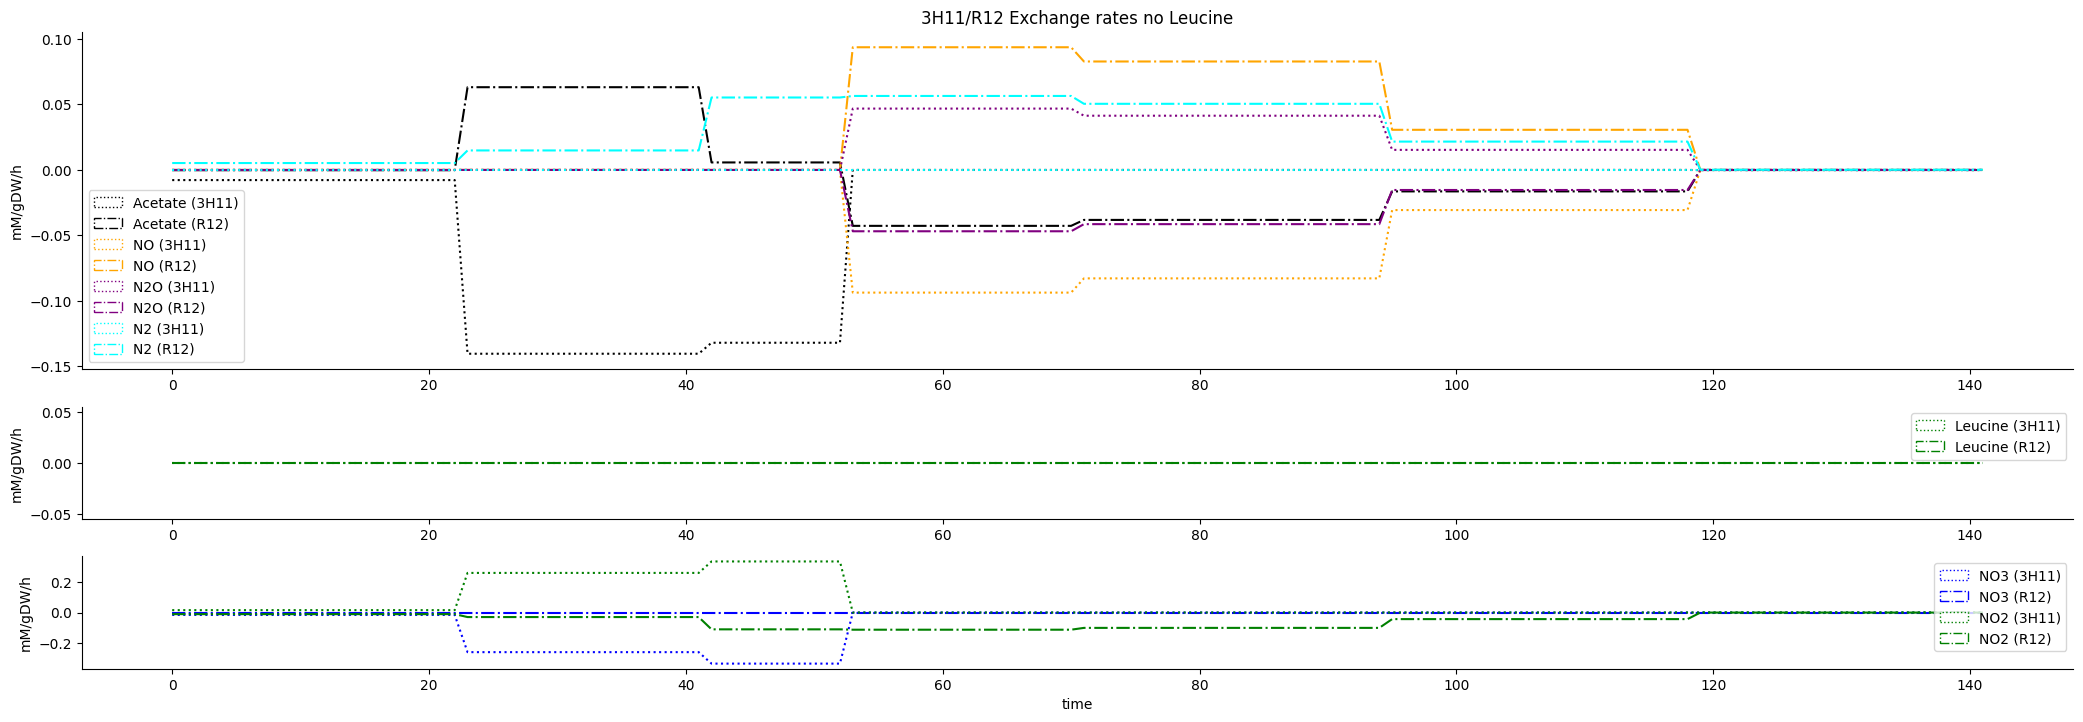

In [31]:
plot_data_zero_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_exp)
plot_data_50_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_leucine_50)
plot_data_10_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_leucine_10)
comm_plots.plot_organism_uptake_data(plot_data_zero_leu, title='3H11/R12 Exchange rates no Leucine')

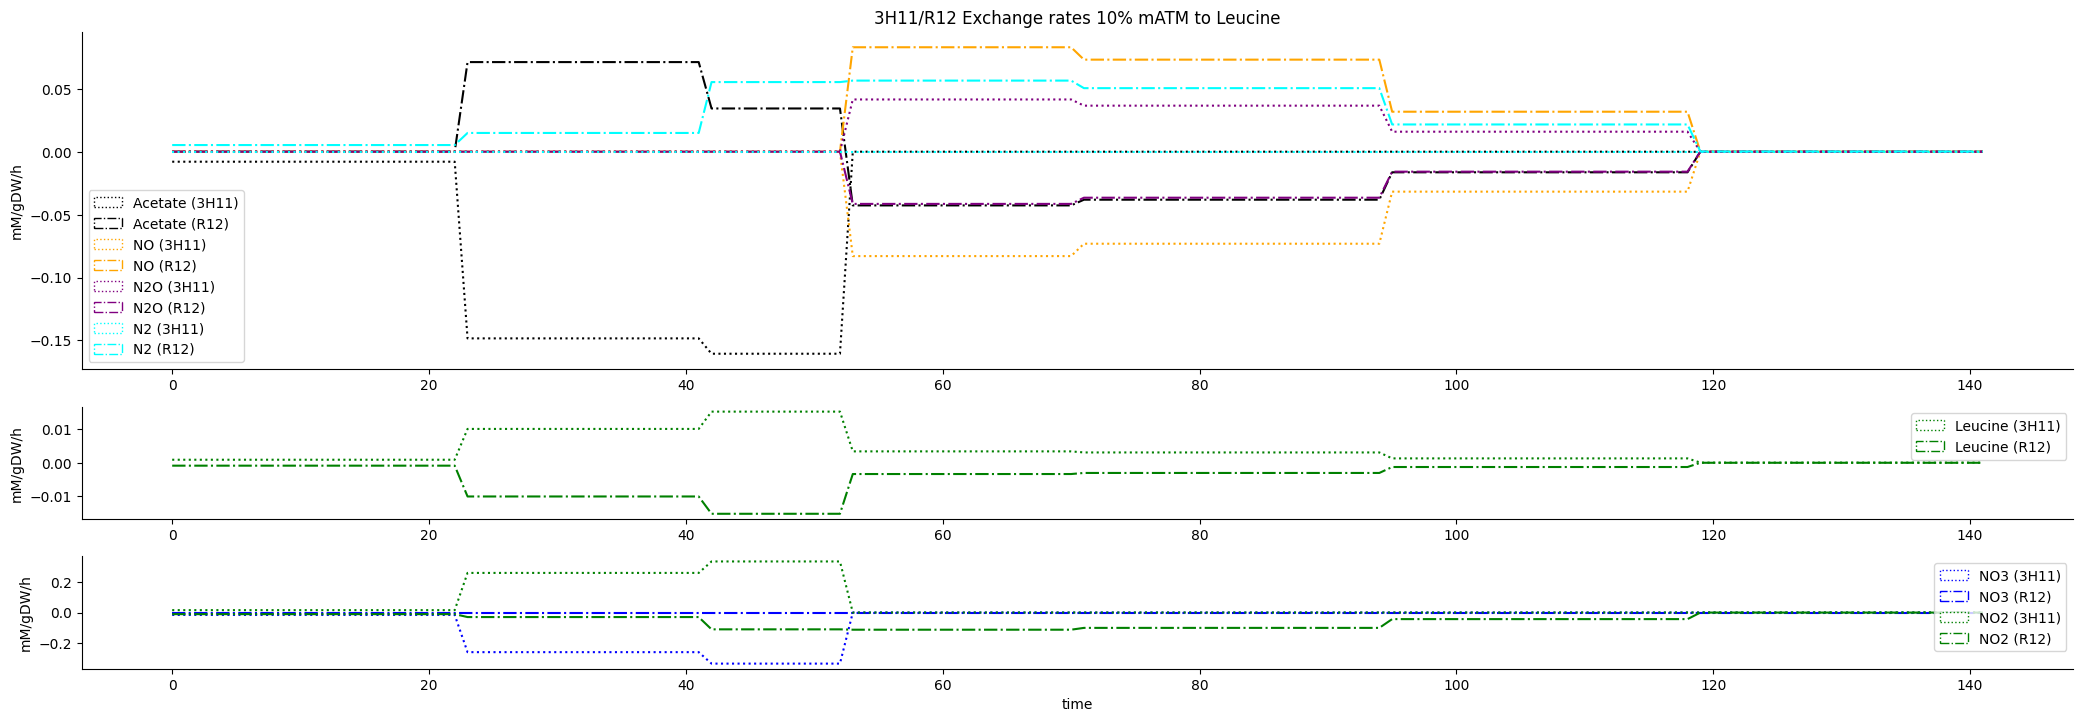

In [32]:
comm_plots.plot_organism_uptake_data(plot_data_10_leu, title='3H11/R12 Exchange rates 10% mATM to Leucine')

In [40]:
pd.DataFrame(plot_data_50_leu[1])

,i,growth,acetate,no3,no2,no,n2o,n2,leu
0,0,0.000002,-0.011804,-0.013135,0.013135,0.0,0.0,0.0,0.003942
1,1,0.000002,-0.011804,-0.013135,0.013135,0.0,0.0,0.0,0.003942
2,2,0.000002,-0.011804,-0.013135,0.013135,0.0,0.0,0.0,0.003942
3,3,0.000002,-0.011804,-0.013135,0.013135,0.0,0.0,0.0,0.003942
4,4,0.000002,-0.011804,-0.013135,0.013135,0.0,0.0,0.0,0.003942
...,...,...,...,...,...,...,...,...,...
137,137,0.000000,-0.000304,-0.000336,0.000336,0.0,0.0,0.0,0.000108
138,138,0.000000,-0.000304,-0.000336,0.000336,0.0,0.0,0.0,0.000108
139,139,0.000000,-0.000304,-0.000336,0.000336,0.0,0.0,0.0,0.000108
140,140,0.000000,-0.000304,-0.000336,0.000336,0.0,0.0,0.0,0.000108


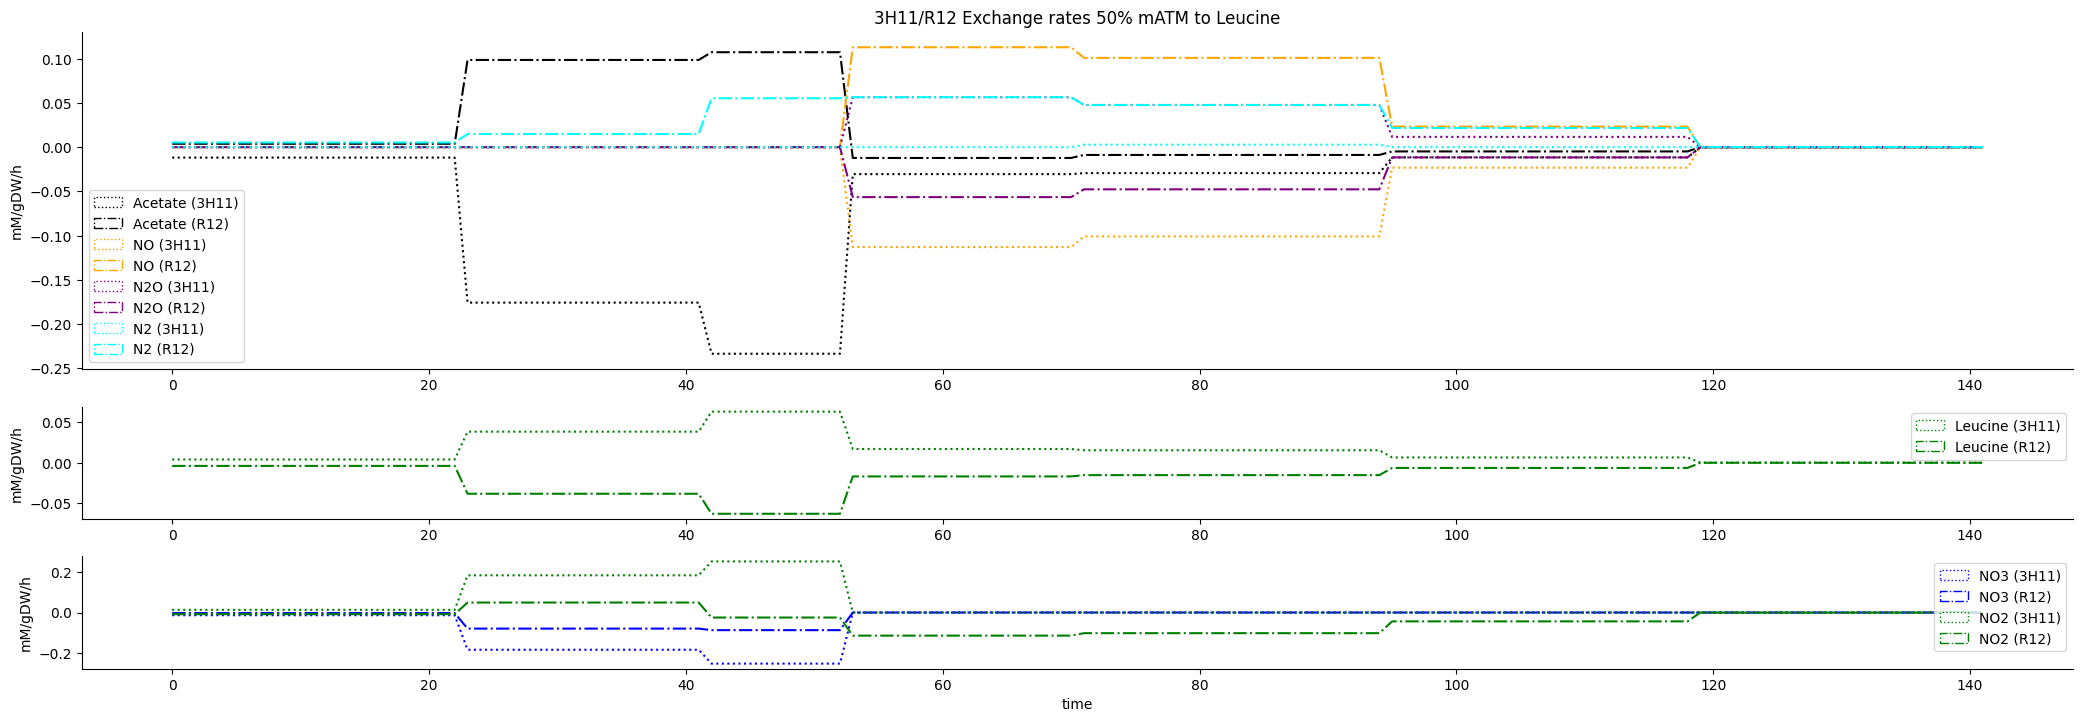

In [33]:
comm_plots.plot_organism_uptake_data(plot_data_50_leu, title='3H11/R12 Exchange rates 50% mATM to Leucine')

In [51]:
print('R12')
#_exp_atpm_steps(model_rhoda, exp_data_r12, df_growth_data_r12.transpose().to_dict())

R12


In [249]:
print('3H11')
_exp_atpm_steps(model_acido, exp_data_3h11, df_growth_data_3h11.transpose().to_dict())

3H11


,total_time,gdw,ac,no3,no2,n2o,atpm,atpm_per_gdw_per_h
0,23.0,0.000006,-0.009394,-0.054518,0.041815,0.0,0.050478,0.002195
1,19.0,0.000009,-0.091716,-0.344241,0.337841,0.0,0.474340,0.024965
2,11.0,0.000005,-0.013321,-0.111735,0.144979,0.0,0.072216,0.006565
3,18.0,0.000006,0.018274,0.000797,0.007772,0.0,NaN,NaN
4,24.0,-0.000003,-0.004143,0.000138,-0.004123,0.0,NaN,NaN


In [40]:
for i in range(7):
    time_step = time_steps[i]
    sol = solution_exp[i]
    print(sol.fluxes['ATPM_cA'], sol.fluxes['ATPM_cR'], sol.fluxes['ATPM_cA']/time_step, sol.fluxes['ATPM_cR']/time_step, 
          (sol.fluxes['ATPM_cA']/time_step)+(sol.fluxes['ATPM_cR']/time_step))
    """
    if sol.fluxes['bio1_A'] != 0:
        print('3H11', sol.fluxes['bio1_A'], sol.fluxes['ATPM_cA'], sol.fluxes['ATPM_cA']/time_step, 
          sol.fluxes['ATPM_cA']/sol.fluxes['bio1_A'])
        
    if sol.fluxes['bio1_R'] != 0:
        print('R12 ', sol.fluxes['bio1_R'], sol.fluxes['ATPM_cR'], sol.fluxes['ATPM_cA']/time_step, 
          sol.fluxes['ATPM_cR']/sol.fluxes['bio1_R'])
    """

0.01130257635047471 0.01689088432918685 0.0004914163630641178 0.000734386275182037 0.0012258026382461547
0.13052263047685217 0.19576286630573705 0.0068696121303606405 0.010303308752933529 0.017172920883294168
0.1974541430141318 0.29619219428759513 0.017950376637648344 0.026926563117054103 0.044876939754702444
0.043788508437618806 0.06568363367233498 0.0024326949132010447 0.003649090759574166 0.006081785672775211
0.03964044933490131 0.059459413713714465 0.0016516853889542212 0.0024774755714047692 0.00412916096035899
0.016702009179059115 0.02504706287020606 0.0006959170491274632 0.001043627619591919 0.0017395446687193824
0.0002876486250000001 0.00043147293749999996 1.2506461956521744e-05 1.8759692934782607e-05 3.1266154891304354e-05
